# Validate a polynomial chaos

In this example, we show how to perform the draw validation of a polynomial chaos for the Ishigami function.

In [1]:
import openturns as ot
from math import pi

Create the Ishigami test function.

In [2]:
ot.RandomGenerator.SetSeed(0)
formula = ['sin(X1) + 7. * sin(X2)^2 + 0.1 * X3^4 * sin(X1)']
input_names = ['X1', 'X2', 'X3']
g = ot.SymbolicFunction(input_names, formula)

Create the probabilistic model

In [3]:
distributionList = [ot.Uniform(-pi, pi)] * 3
distribution = ot.ComposedDistribution(distributionList)

Create a training sample

In [4]:
N = 100 
inputTrain = distribution.getSample(N)
outputTrain = g(inputTrain)

Create the chaos.

We could use only the input and output training samples: in this case, the distribution of the input sample is computed by selecting the best distribution that fits the data. 

In [5]:
chaosalgo = ot.FunctionalChaosAlgorithm(inputTrain, outputTrain)

Since the input distribution is known in our particular case, we instead create the multivariate basis from the distribution.

In [6]:
multivariateBasis = ot.OrthogonalProductPolynomialFactory(distributionList)
totalDegree = 8
enumfunc = multivariateBasis.getEnumerateFunction()
P = enumfunc.getStrataCumulatedCardinal(totalDegree)
adaptiveStrategy = ot.FixedStrategy(multivariateBasis, P)

In [7]:
selectionAlgorithm = ot.LeastSquaresMetaModelSelectionFactory()
projectionStrategy = ot.LeastSquaresStrategy(inputTrain, outputTrain, selectionAlgorithm)

In [8]:
chaosalgo = ot.FunctionalChaosAlgorithm(inputTrain, outputTrain, distribution, adaptiveStrategy, projectionStrategy)

In [9]:
chaosalgo.run()
result = chaosalgo.getResult()
metamodel = result.getMetaModel()

In order to validate the metamodel, we generate a test sample.

In [10]:
n_valid = 1000
inputTest = distribution.getSample(n_valid)
outputTest = g(inputTest)
val = ot.MetaModelValidation(inputTest, outputTest, metamodel)
Q2 = val.computePredictivityFactor()
Q2

0.9992361845215688

The Q2 is very close to 1: the metamodel is excellent.

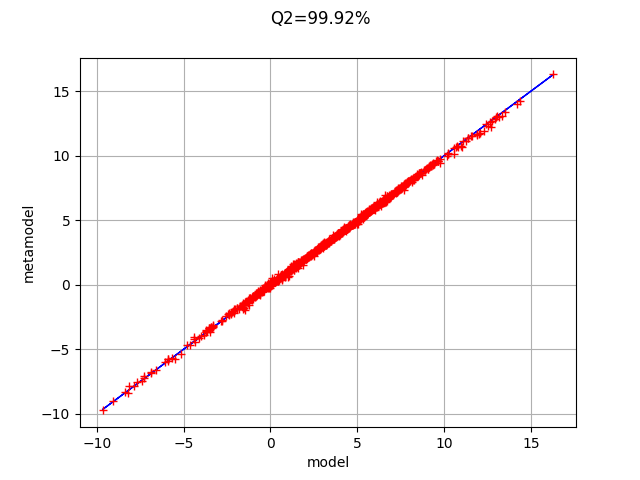

In [11]:
graph = val.drawValidation()
graph.setLegends([""])
graph.setTitle("Q2=%.2f%%" % (Q2*100))
graph

The metamodel has a good predictivity, since the points are almost on the first diagonal.